### **Importing Essential Libraries**

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import nltk
import pandas as pd
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics import classification_report

### **Loading Datasets**

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Training_Essay_Data.csv/Training_Essay_Data.csv")
test=pd.read_csv("/content/drive/MyDrive/Augmented data for LLM - Detect AI Generated Text/final_test.csv")

In [ ]:
data

,text,generated
0,Car-free cities have become a subject of incre...,1
1,"Car Free Cities Car-free cities, a concept ga...",1
2,A Sustainable Urban Future Car-free cities ...,1
3,Pioneering Sustainable Urban Living In an e...,1
4,The Path to Sustainable Urban Living In an ...,1
...,...,...
29140,There has been a fuss about the Elector Colleg...,0
29141,Limiting car usage has many advantages. Such a...,0
29142,There's a new trend that has been developing f...,0
29143,As we all know cars are a big part of our soci...,0


In [ ]:
test

,text,label
0,The Face on Mars is nothing but a natural occu...,0
1,Students have a higher chance of catching a vi...,0
2,Driverless cars have good and bad things that ...,0
3,Some people might think that traveling in a gr...,1
4,How many of us students want to be forced to d...,0
...,...,...
86582,Dear Principal: I think we should have cell ph...,0
86583,Dear Teacher_NAME\n\nI think that if you try t...,0
86584,"Venus is sometimes called the ""meaning Star."" ...",0
86585,The Seagoing Cowboy Bros\n\nDo you like going ...,0


### **Exploratory Data Analysis**

In [ ]:
data.isnull().sum()

text         0
generated    0
dtype: int64

In [ ]:
data.shape

(29145, 2)

In [ ]:
test.isnull().sum()

text     0
label    0
dtype: int64

In [ ]:
test.shape

(86587, 2)

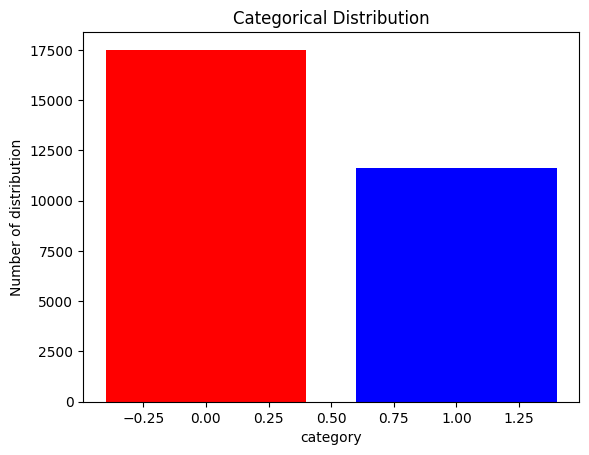

In [ ]:
index = data['generated'].value_counts().index
values = data['generated'].value_counts().values

plt.bar(index,values,color=['r','b'])
plt.title("Categorical Distribution")
plt.xlabel("category")
plt.ylabel("Number of distribution")
plt.show()

In [ ]:
test['label'].value_counts()

0    55845
1    30742
Name: label, dtype: int64

In [ ]:
y = data['generated']
data = data.drop('generated', axis=1)

In [ ]:
y_test = test['label']
test = test.drop('label', axis=1)

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
model_pipline = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words='english',lowercase=True, tokenizer=word_tokenize, ngram_range=(1, 1))),
    ('scaler', MaxAbsScaler()),
    ('model', LogisticRegression(max_iter=200, random_state=42))
]
)

model_pipline.fit(data['text'], y)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(stop_words='english',
                                 tokenizer=<function word_tokenize at 0x7ef55f60ec20>)),
                ('scaler', MaxAbsScaler()),
                ('model', LogisticRegression(max_iter=200, random_state=42))])

### **Model Evaluation**

In [ ]:
pred = model_pipline.predict(test['text'])

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     55845
           1       0.94      0.95      0.95     30742

    accuracy                           0.96     86587
   macro avg       0.96      0.96      0.96     86587
weighted avg       0.96      0.96      0.96     86587



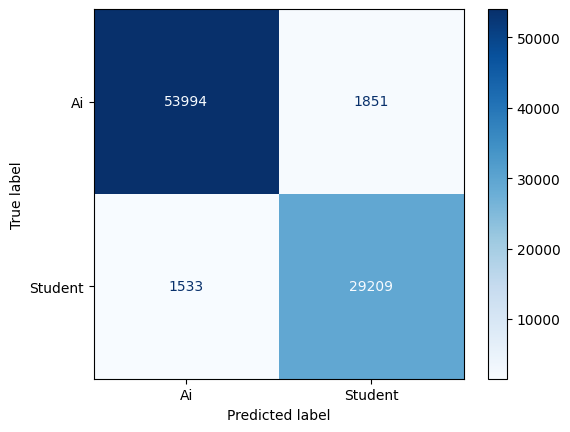

In [ ]:
cm = confusion_matrix(y_test, pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ai', 'Student'])
disp.plot(cmap='Blues', values_format='d')

plt.show()

In [ ]:
def aigenerate(text: list) -> str:
    predict = model_pipline.predict(text)
    if predict == 1:
        return 'This text was generated by artificial intelligence'
    if predict == 0:
        return 'This text was written by a man'

### **Testting on Real-time Data**

In [ ]:
ex1 = "In the quaint town of Willowbrook, nestled among rolling hills and whispering pines, there lived a curious young girl named Eliza. With eyes as bright as the morning sun and an insatiable thirst for adventure, she wandered the cobblestone streets, her imagination weaving tales of magic and mystery. One fateful evening, as twilight cast its enchanting spell over the town, Eliza stumbled upon an ancient book hidden in the depths of the library. Its pages, yellowed with age and filled with forgotten wisdom, beckoned her to embark on a journey beyond her wildest dreams. Little did she know that within those weathered pages lay the key to unlocking a realm of wonders, where mythical creatures roamed and destinies were forged. With courage in her heart and the whispers of the wind guiding her, Eliza set forth on an extraordinary adventure, destined to discover the true magic that lay within her own soul."
ex2 = "Talk to people while they walk, use public transportation and it would benefit local bussiness even. In sorce 1, they say that in the new approach of limiting the access of cars, stores would be placed by a walkside, somewhere you can walk to instead of being placed inside a mall along a distant highway. In source 3, it says that the limited amount of automobiles has lead to the construction of 118 miles of bicycle paths, parks and sports centers have bloomed and even the sidewalks have improved!"
ex3="An LLMs detector refers to tools and methods used to identify text that has been generated by large language models (LLMs). These detectors are designed to distinguish between human-written content and content produced by AI models, which is becoming increasingly important as LLMs become more advanced and widespread. The development of LLMs detectors is a response to the potential misuse of AI-generated text, such as spreading misinformation or committing academic fraud."
ex4="School is a place to learn and grow! We go to class with our friends and teachers. In class, we read, write, and learn about math and science. School is also fun! We get to play games on the playground and learn new things in art and music class"
ex5="We have discussed the most commonly used Cartesian coordinates system. In effect, a frame of reference is any coordinate system relative to which measurements are taken. The position of a table in a room can be located relative to the walls of the room. The room is then the frame of reference.  "


print(aigenerate([ex5]))

This text was generated by artificial intelligence


In [ ]:
import pickle
with open('LLMs_model.pkl', 'wb') as f:
    pickle.dump(model_pipline, f)